In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data  = pd.read_csv('Insights.csv')

In [3]:
raw_data.fillna(0,inplace=True)

In [4]:
X = raw_data['Qty']
Y = raw_data['Unit Rate In FC']

In [5]:
X.shape

(4973,)

In [6]:
X = X.values.reshape(-1,1)
X.shape

(4973, 1)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=45)

In [8]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()

In [9]:
L.fit(X_train.astype(np.float32),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = L.predict(X_test)

In [11]:
L.score(X_train,y_train)

0.001654931454667108

In [12]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score -0.002767654377692219
RMSE 62.48041152531978


In [13]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001)

In [14]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
y_predt1 = R.predict(X_test)

In [16]:
print("R2 score",r2_score(y_test,y_predt1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predt1)))

R2 score -0.0027676592103733633
RMSE 62.48041167587704


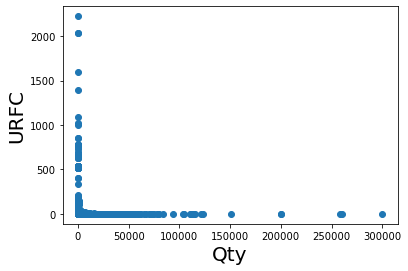

In [17]:
plt.scatter(X,Y)
# yhat = -0.0003*x1+21.7330
# fig = plt.plot(X,Y,lw=4,c='orange',label='regression line')
plt.xlabel('Qty',fontsize=20)
plt.ylabel('URFC',fontsize= 20)
plt.show()

In [36]:
Y = Y.values.reshape(-1,1)

In [37]:
X,Y

(array([[  86.],
        [ 710.],
        [ 100.],
        ...,
        [  12.],
        [3032.],
        [  12.]]),
 array([[17.95],
        [ 4.33],
        [23.65],
        ...,
        [ 9.5 ],
        [ 2.9 ],
        [ 9.5 ]]))

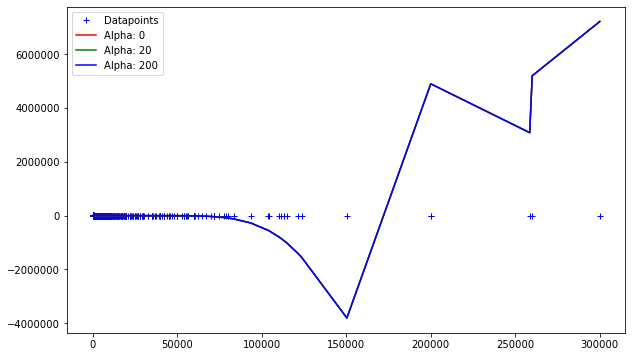

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(X, Y, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(X, Y)
    return model.predict(X)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(X, Y, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(X, Y, alpha)
    # Plot
    plt.plot(sorted(X[:, 0]), preds[np.argsort(X[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [ ]:
preds[np.argsort(X[:, 0])]